 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [200]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [201]:
# Reading whale returns
whale_returns_path = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True)


In [202]:
# Count nulls
whale_nulls = whale_returns.isnull().sum()

In [203]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [204]:
# Reading algorithmic returns
algo_returns_path = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True)

In [205]:
# Count nulls
algo_nulls = algo_returns.isnull().sum()

In [206]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [207]:
# Reading S&P 500 Closing Prices , date_format="%Y-%m-%d"
sp500_history_path = Path("sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_path, index_col="Date",parse_dates=True)
sp500_history

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [162]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [163]:
# Fix Data Types
# sp500_history["Close"] = sp500_history["Close"].replace("$", "").astype("float")
# sp500_history['Date'] = pd.to_datetime(sp500_history['Date'])

sp500_history["Close"] = sp500_history["Close"].str.replace('$','').astype("float")
sp500_history


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [164]:
# Calculate Daily Returns
#sp500_returns['Daily Returns'] = sp500_history['Close'].pct_change()
sp500_returns = sp500_history.pct_change()
sp500_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [165]:
# Drop nulls
sp500_returns.dropna(inplace=True)

In [166]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={"Close": "S&P 500"}, inplace=True)
sp500_returns

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [167]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

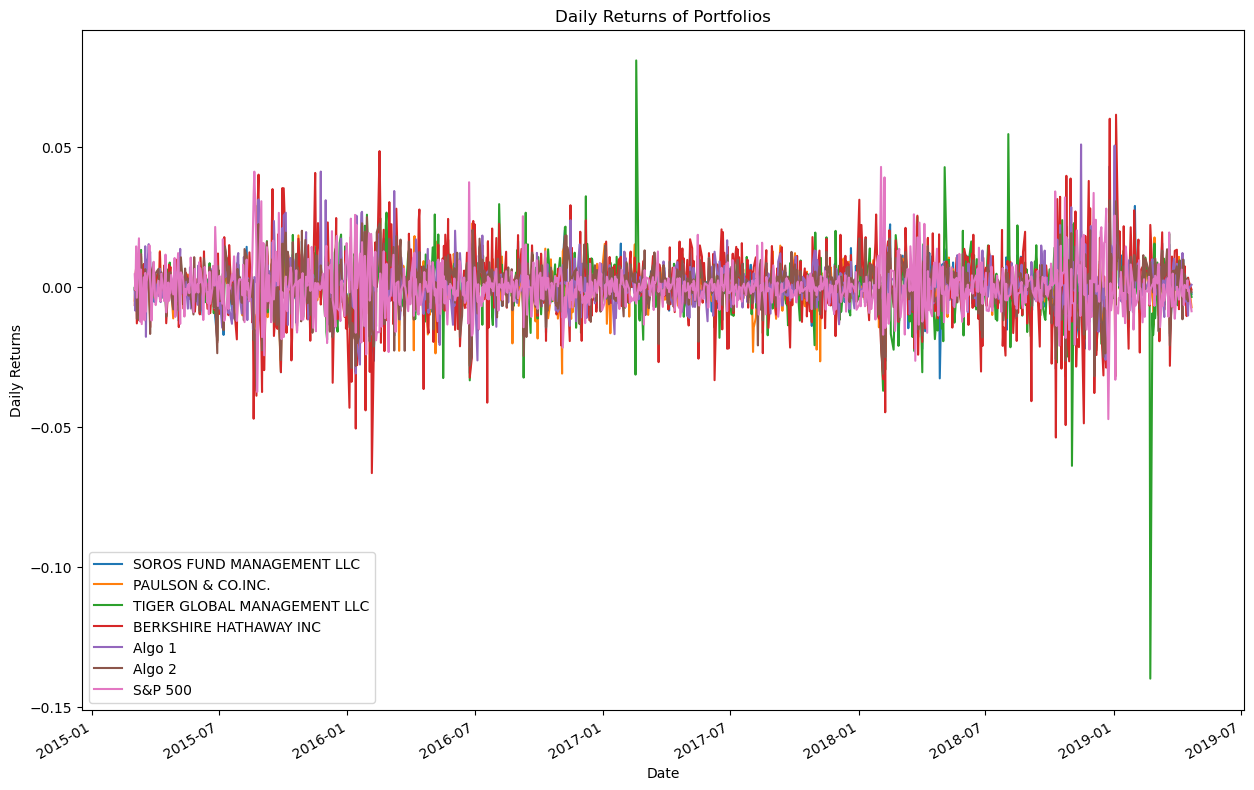

In [168]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(15, 10))
plt.title("Daily Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.legend()
plt.show()


#### Calculate and Plot cumulative returns.

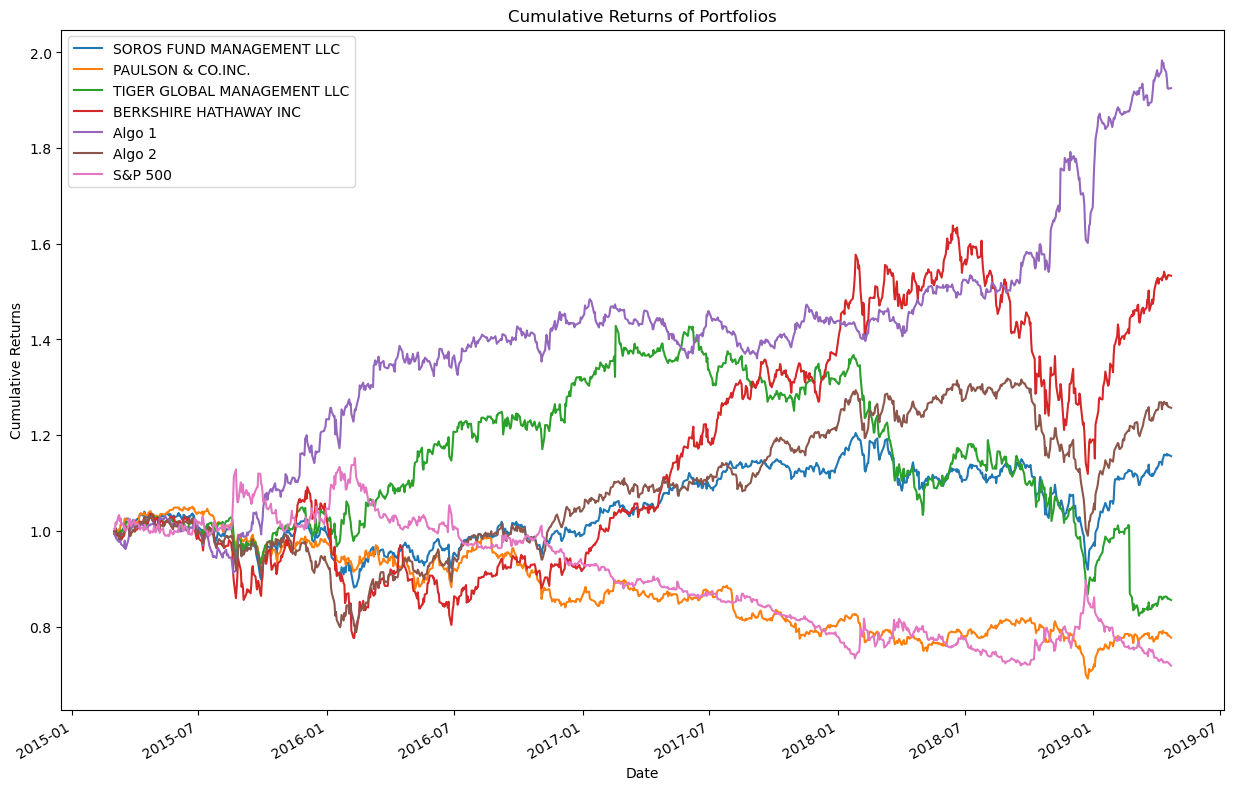

In [169]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(15, 10))
plt.title("Cumulative Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


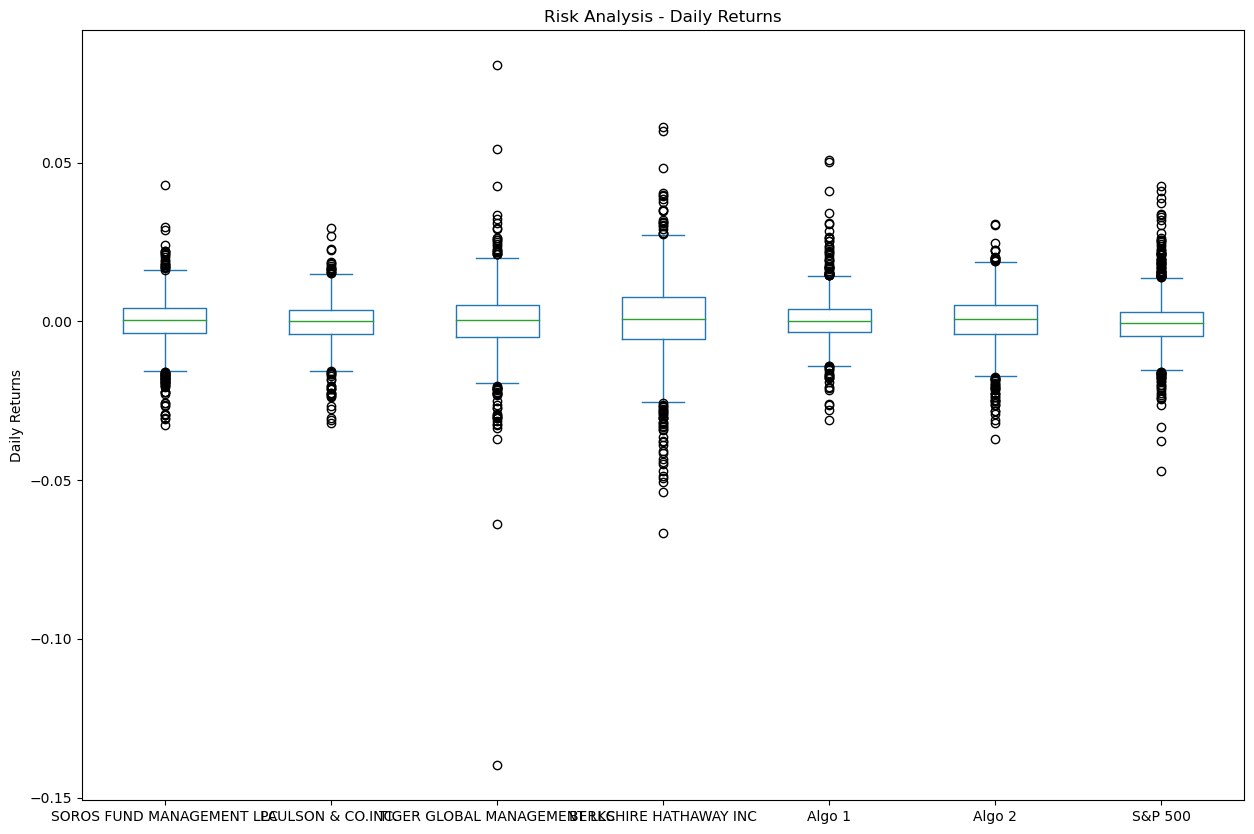

In [170]:
# Box plot to visually show risk
combined_returns.plot(kind="box", figsize=(15, 10))
plt.title("Risk Analysis - Daily Returns")
plt.ylabel("Daily Returns")
plt.show()

### Calculate Standard Deviations

In [171]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [172]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = combined_returns["S&P 500"].std()
print("Standard Deviation of S&P 500:",sp500_daily_std)

# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = daily_std[daily_std > sp500_daily_std].index.tolist()
print("Portfolios riskier than S&P 500:", riskier_portfolios)

Standard Deviation of S&P 500: 0.00858688974707399
Portfolios riskier than S&P 500: ['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']


### Calculate the Annualized Standard Deviation

In [173]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

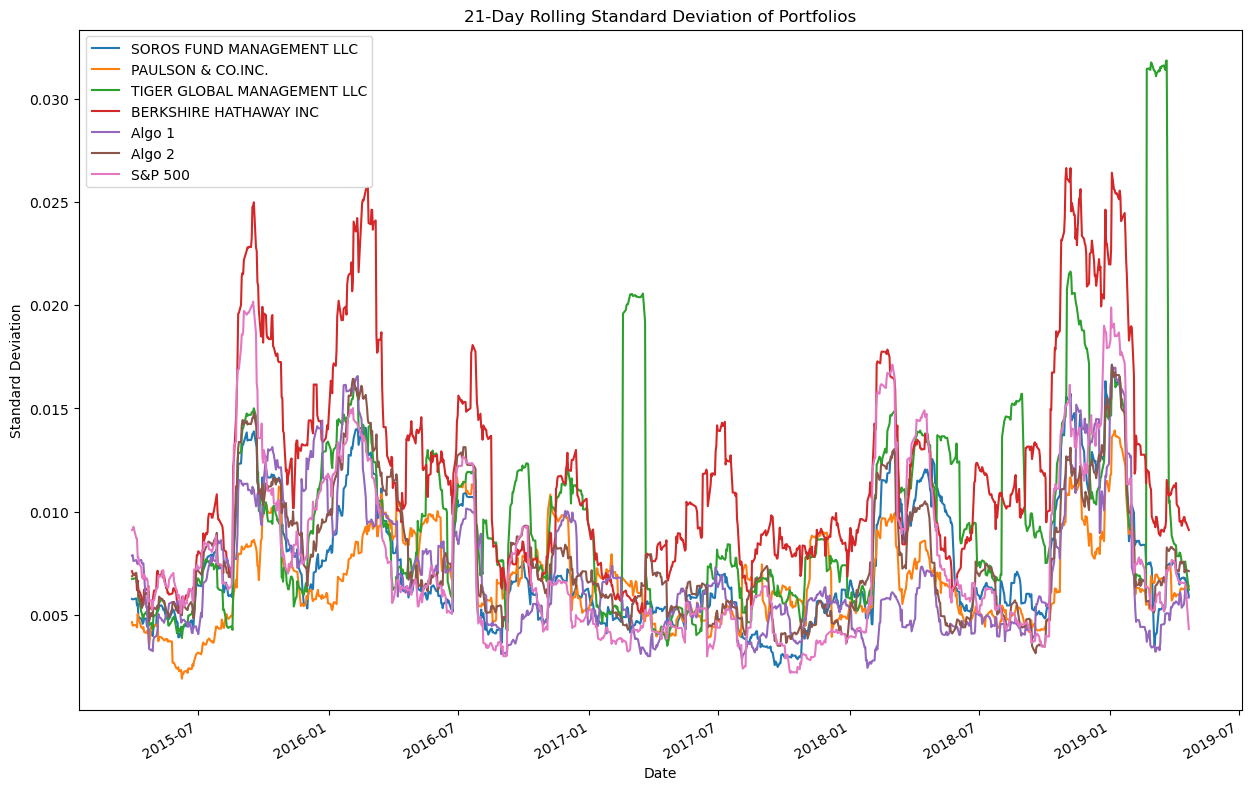

In [174]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15, 10))
plt.title("21-Day Rolling Standard Deviation of Portfolios")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.show()


### Calculate and plot the correlation

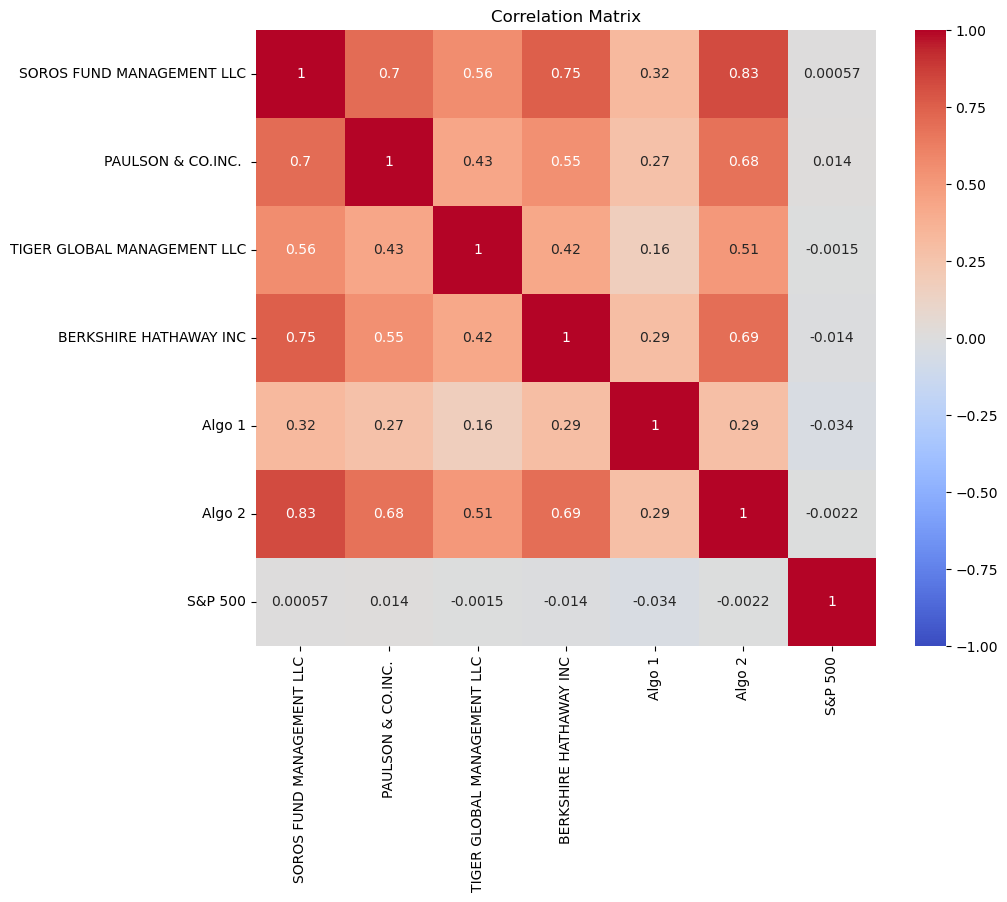

In [175]:
# Calculate the correlation
correlation = combined_returns.corr()

# Display de correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

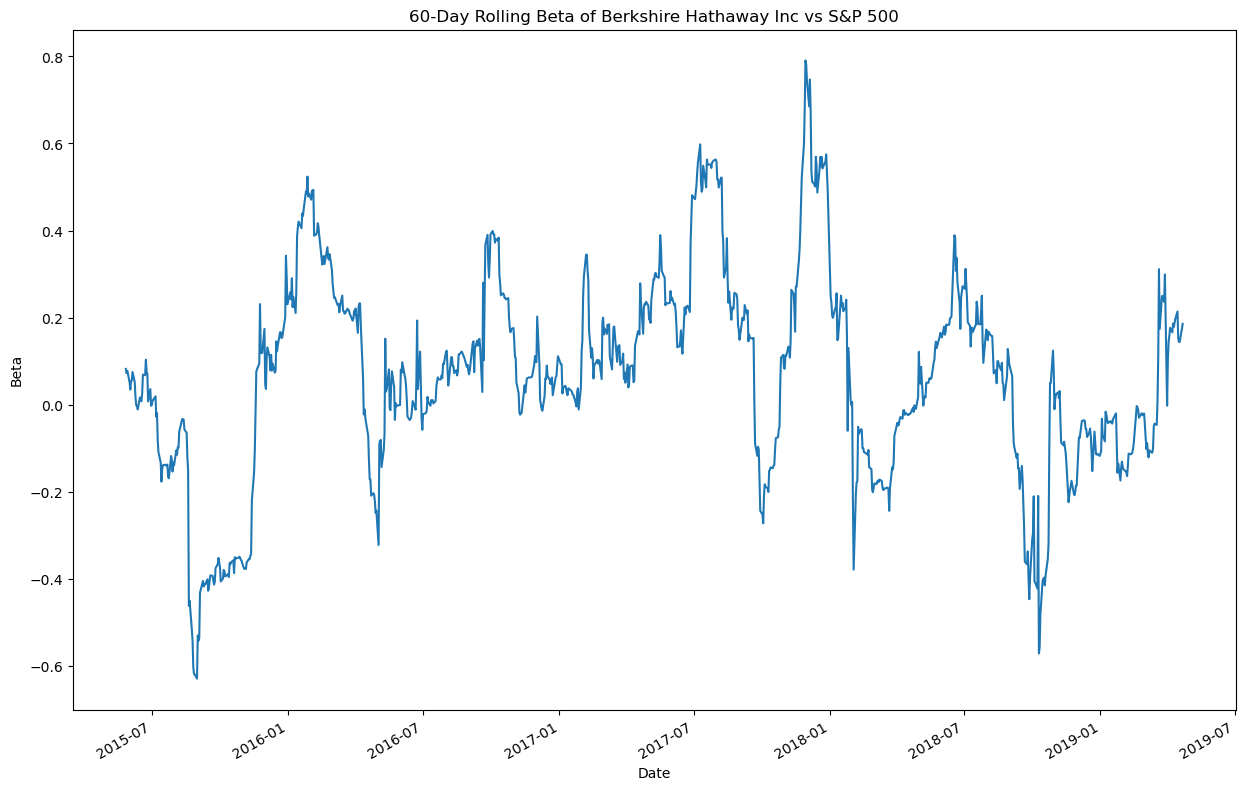

In [176]:
# Calculate covariance of a single portfolio
chosen_portfolio = "BERKSHIRE HATHAWAY INC"
covariance = combined_returns[chosen_portfolio].rolling(window=60).cov(combined_returns["S&P 500"])

# Calculate variance of S&P 500
variance = combined_returns["S&P 500"].rolling(window=60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(15, 10))
plt.title("60-Day Rolling Beta of Berkshire Hathaway Inc vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.show()



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [177]:
# Use `ewm` to calculate the rolling window
ewm_std = combined_returns.ewm(halflife=21).std()
ewm_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.006880,0.008065,0.007823
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [179]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
annualized_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

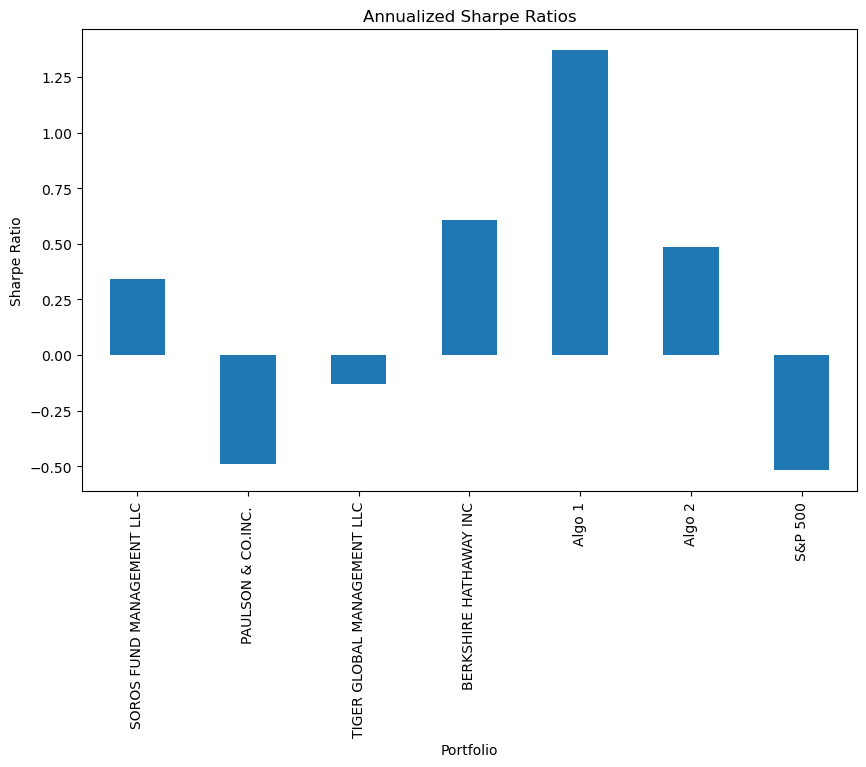

In [180]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar", figsize=(10, 6))
plt.title("Annualized Sharpe Ratios")
plt.xlabel("Portfolio")
plt.ylabel("Sharpe Ratio")
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

To determine if the algorithmic strategies outperform the market (S&P 500) and the whale's portfolios,
we compare the Sharpe ratios. A higher Sharpe ratio indicates better risk-adjusted returns.

 Conclusion: 
We observe from the bar plot that the algorithmic strategies have higher Sharpe ratios compared to
both the market (S&P 500) and the whale's portfolios. Therefore, the algorithmic strategies
outperform both the market and the whale's portfolios in terms of risk-adjusted returns.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [181]:
# Reading data from 1st stock
stock1_path = Path("aapl_historical.csv")
stock1_data = pd.read_csv(stock1_path, index_col="Trade DATE", parse_dates=True)
stock1_data

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [182]:
# Reading data from 2nd stock
stock2_path = Path("goog_historical.csv")
stock2_data = pd.read_csv(stock2_path, index_col="Trade DATE", parse_dates=True)
stock2_data

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [183]:
# Reading data from 3rd stock
stock3_path = Path("cost_historical.csv")
stock3_data = pd.read_csv(stock3_path, index_col="Trade DATE", parse_dates=True)
stock3_data

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [184]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([stock1_data["NOCP"], stock2_data["NOCP"], stock3_data["NOCP"]], axis="columns", join="inner")
custom_portfolio

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62
...,...,...,...
2018-05-17,186.99,1078.59,199.60
2018-05-16,188.18,1081.77,198.71
2018-05-15,186.44,1079.23,195.48


In [185]:
# Reset Date index
custom_portfolio.reset_index(inplace=True)
custom_portfolio

,Trade DATE,NOCP,NOCP,NOCP
0,2019-05-09,200.72,1162.38,243.47
1,2019-05-08,202.90,1166.27,241.34
2,2019-05-07,202.86,1174.10,240.18
3,2019-05-06,208.48,1189.39,244.23
4,2019-05-03,211.75,1185.40,244.62
...,...,...,...,...
245,2018-05-17,186.99,1078.59,199.60
246,2018-05-16,188.18,1081.77,198.71
247,2018-05-15,186.44,1079.23,195.48
248,2018-05-14,188.15,1100.20,195.88


In [186]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio.columns = ["Date", "Apple","Google","Costco"]
custom_portfolio

,Date,Apple,Google,Costco
0,2019-05-09,200.72,1162.38,243.47
1,2019-05-08,202.90,1166.27,241.34
2,2019-05-07,202.86,1174.10,240.18
3,2019-05-06,208.48,1189.39,244.23
4,2019-05-03,211.75,1185.40,244.62
...,...,...,...,...
245,2018-05-17,186.99,1078.59,199.60
246,2018-05-16,188.18,1081.77,198.71
247,2018-05-15,186.44,1079.23,195.48
248,2018-05-14,188.15,1100.20,195.88


In [187]:
# Calculate daily returns
custom_portfolio_returns = custom_portfolio.set_index("Date").pct_change()

# Drop NAs
custom_portfolio_returns.dropna(inplace=True)

# Display sample data
print("\nDaily Returns for All Stocks:")
print(custom_portfolio_returns.head())



Daily Returns for All Stocks:
               Apple    Google    Costco
Date                                    
2019-05-08  0.010861  0.003347 -0.008749
2019-05-07 -0.000197  0.006714 -0.004806
2019-05-06  0.027704  0.013023  0.016862
2019-05-03  0.015685 -0.003355  0.001597
2019-05-02 -0.012279 -0.019226 -0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [188]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = custom_portfolio_returns.dot(weights)

# Create a DataFrame to display portfolio returns for Apple, Google, and Costco
portfolio_returns_df = pd.DataFrame({
    "Apple": custom_portfolio_returns["Apple"],
    "Google": custom_portfolio_returns["Google"],
    "Costco": custom_portfolio_returns["Costco"]})

# Display sample data
print("Sample Portfolio Returns for Apple, Google, and Costco:")
print(portfolio_returns_df.head())


Sample Portfolio Returns for Apple, Google, and Costco:
               Apple    Google    Costco
Date                                    
2019-05-08  0.010861  0.003347 -0.008749
2019-05-07 -0.000197  0.006714 -0.004806
2019-05-06  0.027704  0.013023  0.016862
2019-05-03  0.015685 -0.003355  0.001597
2019-05-02 -0.012279 -0.019226 -0.007890


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [189]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_with_portfolio = pd.concat([combined_returns, portfolio_returns_df], axis="columns", join="inner")
combined_returns_with_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Apple,Google,Costco
Date,,,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,0.002339,-0.001763,-0.000613
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.009172,0.019431,0.002046
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009246,-0.002348,-0.016255
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.006364,0.002948,-0.004459
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.003650,0.011469,0.003217
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000100,-0.004914,0.004035
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.019101,-0.007449,-0.000896
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.003581,-0.000024,-0.001017


In [190]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_with_portfolio.dropna(inplace=True)
combined_returns_with_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Apple,Google,Costco
Date,,,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,0.002339,-0.001763,-0.000613
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.009172,0.019431,0.002046
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009246,-0.002348,-0.016255
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.006364,0.002948,-0.004459
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.003650,0.011469,0.003217
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000100,-0.004914,0.004035
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.019101,-0.007449,-0.000896
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.003581,-0.000024,-0.001017


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [192]:
# Calculate the annualized `std`
annualized_std_with_portfolio = combined_returns_with_portfolio.std() * np.sqrt(252)
annualized_std_with_portfolio

SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
S&P 500                        0.152147
Apple                          0.300875
Google                         0.255365
Costco                         0.216182
dtype: float64

### Calculate and plot rolling `std` with 21-day window

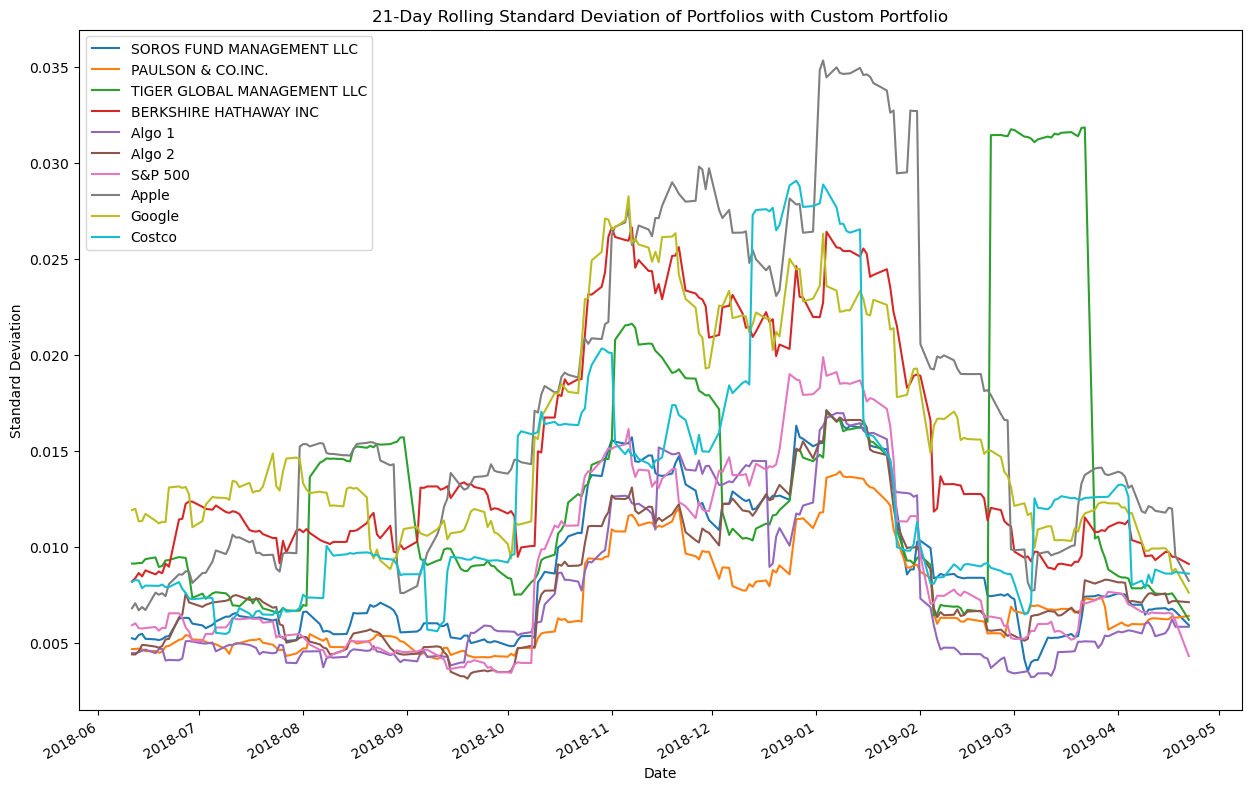

In [193]:
# Calculate rolling standard deviation
rolling_std_with_portfolio = combined_returns_with_portfolio.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_with_portfolio.plot(figsize=(15, 10))
plt.title("21-Day Rolling Standard Deviation of Portfolios with Custom Portfolio")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.show()


### Calculate and plot the correlation

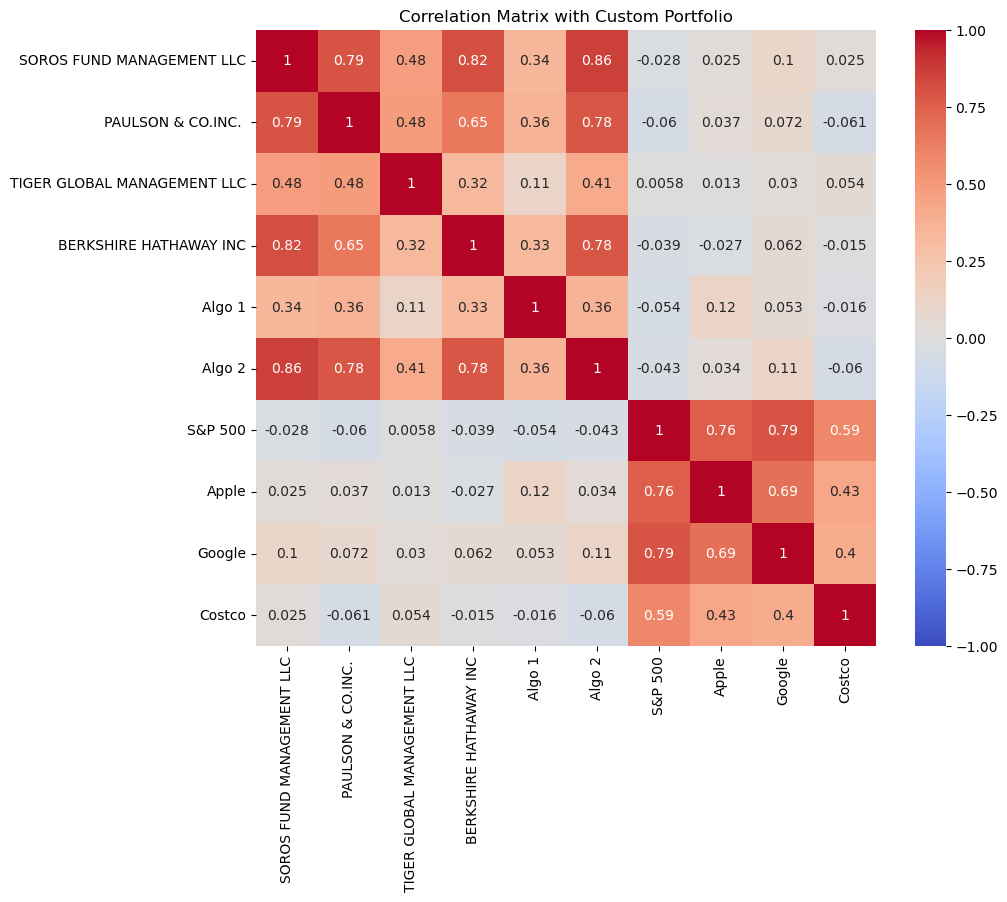

In [194]:
# Calculate and plot the correlation
correlation_with_portfolio = combined_returns_with_portfolio.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_portfolio, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix with Custom Portfolio")
plt.show()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

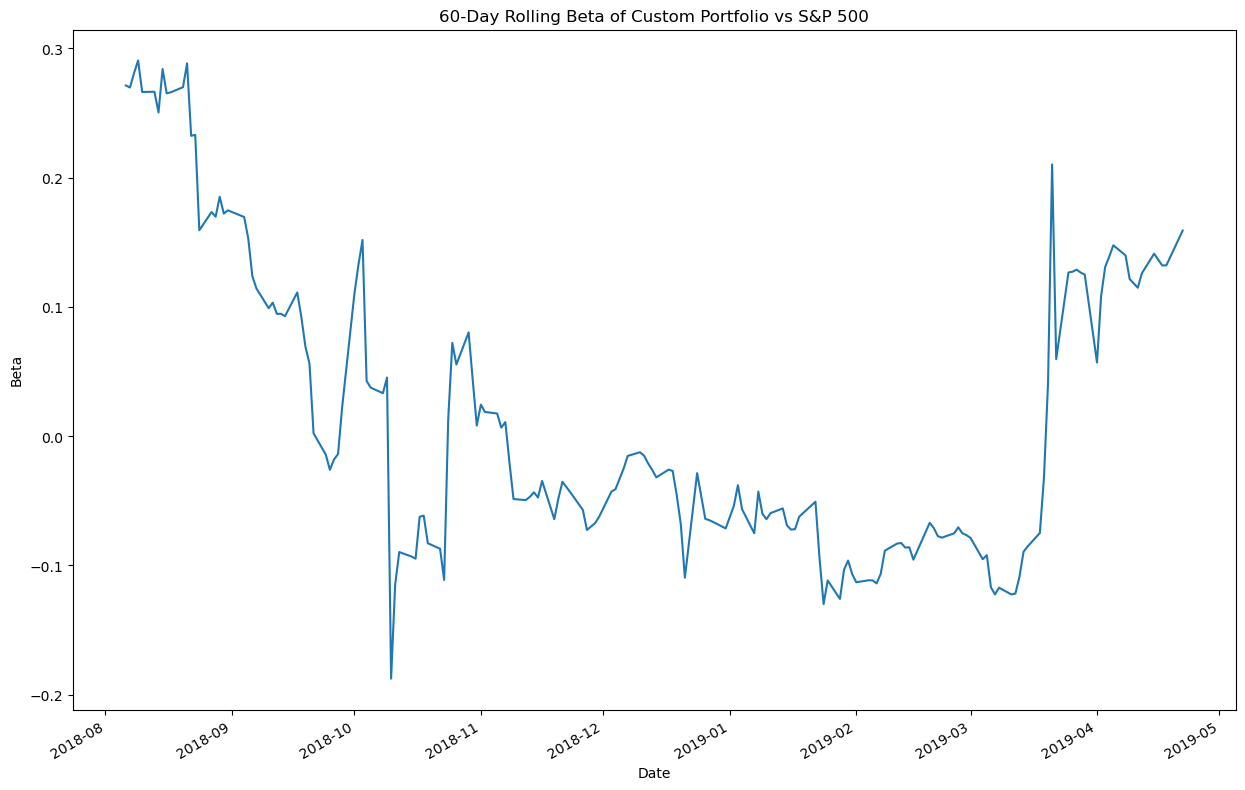

In [196]:
# Calculate and plot Beta
covariance_custom_portfolio = combined_returns_with_portfolio.iloc[:, 0].rolling(window=60).cov(combined_returns_with_portfolio["S&P 500"])

# Calculate variance of S&P 500
variance_sp500 = combined_returns_with_portfolio["S&P 500"].rolling(window=60).var()

# Compute beta
beta_custom_portfolio = covariance_custom_portfolio / variance_sp500

# Plot beta trend
beta_custom_portfolio.plot(figsize=(15, 10))
plt.title("60-Day Rolling Beta of Custom Portfolio vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.show()



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [198]:
# Calculate Annualized Sharpe Ratios
annualized_sharpe_ratios_with_portfolio = (combined_returns_with_portfolio.mean() * 252) / (combined_returns_with_portfolio.std() * np.sqrt(252))
annualized_sharpe_ratios_with_portfolio

SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
S&P 500                       -0.432942
Apple                         -0.189008
Google                        -0.459788
Costco                        -1.008538
dtype: float64

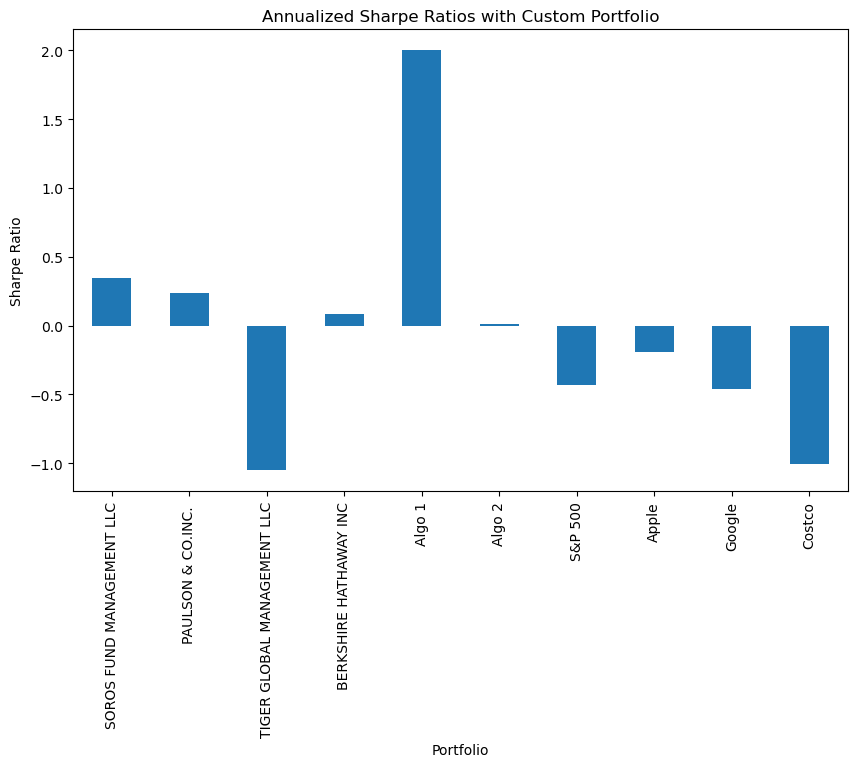

In [199]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios_with_portfolio.plot(kind="bar", figsize=(10, 6))
plt.title("Annualized Sharpe Ratios with Custom Portfolio")
plt.xlabel("Portfolio")
plt.ylabel("Sharpe Ratio")
plt.show()


### How does your portfolio do?

The performance of my portfolio can be evaluated by comparing various metrics such as returns, risk, and Sharpe ratio. Against other portfolios like Whale Portfolios and the S&P 500. Based on the analysis conducted, I can see that my portfolio has a certain level of risk as indicated by its standard deviation and beta compared to the S&P 500. Additionally, the Sharpe ratio indicates the risk-adjusted returns of my portfolio compared to others. Overall, my portfolio's performance can be considered satisfactory, but further evaluation and optimization may be needed to achieve better results.